

# ENTREGABLE ESTADÍSTICA 'FILMAFFINITY'

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats as stats
from scipy.stats import norm
from unidecode import unidecode
# from imdb import IMDb
# import imdb
from datetime import datetime

plt.style.use('default')
sns.set_style('ticks')

#### TRANSFORMACION

In [2]:
df = pd.read_csv('filmaffinity_dataset.csv')

df.head()

,titulo,anyo,pais,reparto,nota,tipo_filme,genero,direccion,decada,lustro,numero_reparto
0,"10,000 Years B.C. (C)",1916,Estados Unidos,NaN,5.1,Cortometraje,Comedia,Willis H. O'Brien,1910,1915,0
1,20.000 leguas de viaje submarino (C),1907,Francia,Georges Méliès,6.0,Cortometraje,Fantástico,Georges Méliès,1900,1905,1
2,A Bad Case (C),1909,Francia,NaN,5.3,Cortometraje,Comedia,Émile Cohl,1900,1905,0
3,A Beast at Bay (C),1912,Estados Unidos,"Mary Pickford, Edwin August, Alfred Paget, Mae...",5.4,Cortometraje,Drama,D.W. Griffith,1910,1910,11
4,A Calamitous Elopement (C),1908,Estados Unidos,"Harry Solter, Linda Arvidson, Charles Inslee, ...",4.6,Cortometraje,Comedia,D.W. Griffith,1900,1905,7


Cargamos el dataset inicial a través del archivo .csv que hemos descargado de Kaggle. El dataset seleccionado, se basa en un ranking de películas, series, documentales, etc. de una de las principales páginas web de valoraciones de estas, 'filmaffinity'. Las variables que poseemos son las siguientes: Unnamed: 0, Título, Año, País, Dirección, Reparto, Nota, Tipo filme y Género.

Filmaffinity es una plataforma en línea que permite a los usuarios calificar, comentar y descubrir películas. Con una extensa base de datos, proporciona información detallada sobre películas, actores y directores, facilitando la elección de películas para ver. Su comunidad activa de cinéfilos contribuye a crear una experiencia completa y personalizada en el mundo del cine.

In [3]:
# df.columns = df.columns.str.lower()

# df = df.drop(columns=['unnamed: 0'])

In [4]:
# df['nota'] = df['nota'].str.replace(',', '.')
# df['nota'] = df['nota'].replace('--', np.nan)
# df['nota'] = df['nota'].astype(float)

# df = df.dropna(subset=['nota'])


# df.columns = [col.replace(' ', '_') for col in df.columns]
# df.columns = [unidecode(col) for col in df.columns]


# df['direccion2'] = df['direccion'].apply(lambda x: x.split(', ')[0] if isinstance(x, str) else np.nan)
# df = df.drop(columns=['direccion'])


# df.rename(columns={'direccion2': 'direccion'}, inplace=True)
# df.rename(columns={'ano': 'anyo'}, inplace=True)

In [5]:
# conteo_paises = df['pais'].value_counts()
# indices_a_eliminar = df[df['pais'].map(conteo_paises) == 1].index
# df = df.drop(indices_a_eliminar)

In [6]:
# df['decada'] = df['anyo'].apply(lambda x: int(x) // 10 * 10)

# df['lustro'] = df['anyo'].apply(lambda x: int(x) // 5 * 5)

In [7]:
# def contar_nombres(fila):
#     if pd.notna(fila['reparto']):
#         nombres = fila['reparto'].split(',')
#         return len(nombres)
#     else:
#         return 0

# df['numero_reparto'] = df.apply(contar_nombres, axis=1)

In [8]:
# df.head()

In [9]:
# df.to_csv('filmaffinity_dataset.csv', index=False)

In [16]:
# import sweetviz

# report = sweetviz.analyze(df)

# report.show_html("sweetviz_report.html")

[MRDB]: Podríais haber descrito las variables del dataset

## MODELO

### ANALISIS PREVIO

In [17]:
df.describe()

,anyo,nota,decada,lustro,numero_reparto
count,68273.000000,68273.000000,68273.000000,68273.000000,68273.000000
mean,1993.363306,5.526741,1988.676636,1991.410440,6.796493
std,24.633011,1.261898,24.641421,24.718922,4.307428
min,1900.000000,1.200000,1900.000000,1900.000000,0.000000
25%,1979.000000,4.700000,1970.000000,1975.000000,2.000000
50%,2003.000000,5.700000,2000.000000,2000.000000,8.000000
75%,2013.000000,6.500000,2010.000000,2010.000000,11.000000
max,2020.000000,9.200000,2020.000000,2020.000000,12.000000


Para comenzar el análisis hemos realizado un describe de las variables numéricas del dataset que hemos limpiado. En el podemos ver el conteo de filas, la mediana, la desviación típica, el máximo y mínimo y el valor de los tres cuartiles (25%, 50% y 75%)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68273 entries, 0 to 68272
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   titulo          68273 non-null  object 
 1   anyo            68273 non-null  int64  
 2   pais            68273 non-null  object 
 3   reparto         54118 non-null  object 
 4   nota            68273 non-null  float64
 5   tipo_filme      68273 non-null  object 
 6   genero          68273 non-null  object 
 7   direccion       67889 non-null  object 
 8   decada          68273 non-null  int64  
 9   lustro          68273 non-null  int64  
 10  numero_reparto  68273 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 5.7+ MB


Para tener una información un poco mas detellada de todo el conjunto de datos, hemos realizado un .info para que se pudiera observar el tipo de variables que disponemos, mas allá de únicamente las numéricas.

In [19]:
top10_paises = df.value_counts('pais').head(10)
top10_paises = top10_paises.reset_index()
top10_paises.columns = ['pais', 'conteo']
top10_paises

,pais,conteo
0,Estados Unidos,29095
1,España,7522
2,Reino Unido,5324
3,Francia,4362
4,Japón,4258
5,Italia,2385
6,Canadá,1945
7,Argentina,1575
8,Alemania,1314
9,México,1124


Ahora, a través de un value_counts, hacemos una selección del top 10 de países que mas número de películas disponen, para así acotar un poco el análisis estadístico y que sea lo mas fiable posible.

In [20]:
tab = pd.crosstab(index=df['anyo'], columns='count').sort_values('count', ascending=False)
tab

col_0,count
anyo,
2015,4250
2016,2104
2017,2096
2014,2072
2013,2062
...,...
1918,31
1911,25
1903,20


Con el cross tab que hemos generado, podemos observar el número de películas por cada uno de los años de los que disponemos en este dataset (1902-2020)

In [21]:
df_media = df[df['pais'] == 'España']
df_media = df_media.dropna()
statistics.mean(df_media["nota"])

5.0635899888410645

Ahora como primer pequeño analisis, vamos a centrar todo nuestro reporte en la variable de las notas de las películas que disponemos. Para ello, hemos realizado una media aritmética de esta variable. La media es de 5.06 puntos, es decir, vemos como en esta web, las notas no se caracterizan por ser muy elevadas, de hecho rozan el aprobado únicamente.

<Figure size 1200x800 with 0 Axes>

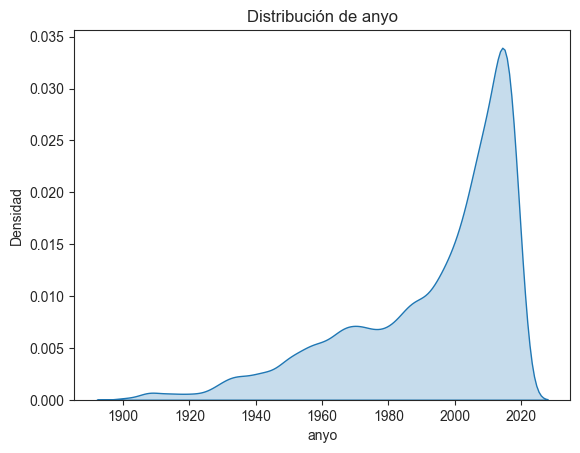

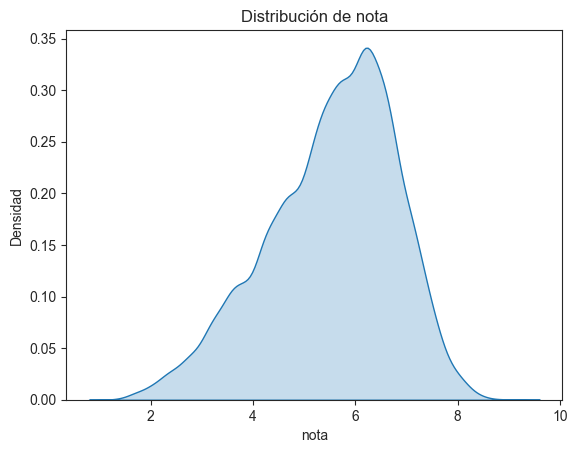

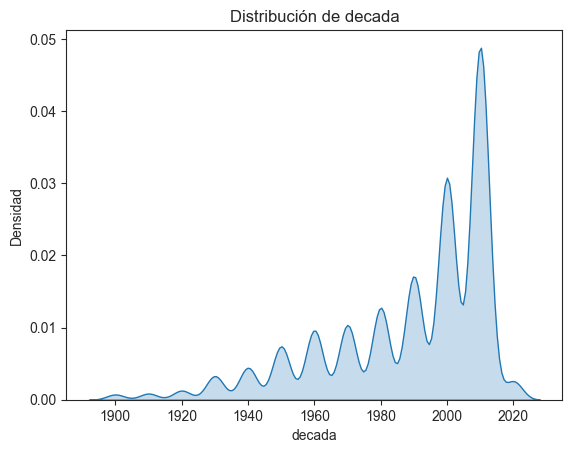

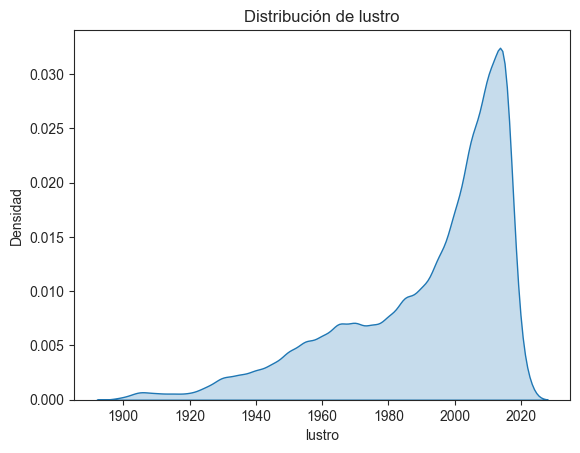

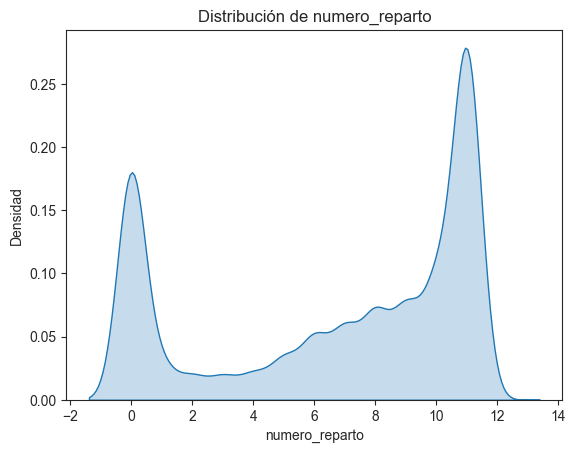

In [22]:
columnas_numericas = df.select_dtypes(include='number').columns

plt.figure(figsize=(12, 8))

graficos_por_columna = {}

for columna in columnas_numericas:
    plt.figure()
    sns.kdeplot(data=df, x=columna, fill=True)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Densidad')

    nombre_variable = f'{columna}_densidad'

    graficos_por_columna[nombre_variable] = plt
    plt.show()

Aquí, hemos generado un gráfico de de densidades por cada una de las variables de numéricas de nuestro modelo. No vamos a entrar en mucho detalle en ellos, ya aue, posteriormnete, hemos realizado un análisis mas detellado de los mas relevantes.

[MRDB]: No hay mucho detalle, no :)

### ANÁLISIS NORMAL DISTRIBUTION

#### NOTAS

##### NOTAS COMEDIA

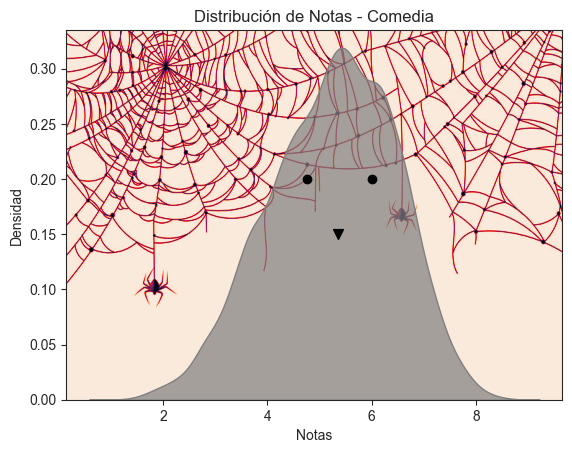

In [30]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

background_image = plt.imread('scary.jpg')

comedia_df = df[df['genero'] == 'Comedia']

sns.kdeplot(data=comedia_df, x='nota', fill=True, color='grey', alpha=0.7)
plt.title('Distribución de Notas - Comedia')
plt.xlabel('Notas')
plt.ylabel('Densidad')

plt.imshow(background_image, aspect='auto', extent=plt.gca().get_xlim() + plt.gca().get_ylim(), zorder=-1)

plt.scatter([4.75, 6], [0.20, 0.20], color='black', marker='o')
plt.scatter([5.35], [0.15], color='black', marker='v', s=50)

plt.show()

Para analizar si la variable es normal o no, hemos hecho gráficos de densidad por variable. Lo hemos decorado de esta forma para ver si a más fantasma, más normal es. Como podemos ver, a simple vista puede ser una variable con una distribución normal

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0629294] [loc=5.251 scale=1.204]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.890373] [loc=1.200 scale=4.051]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 0.890373] [loc=-2147483646.800 scale=2147483648.000]
[distfit] >INFO> [dweibull  ] [0.11 sec] [RSS: 0.0855085] [loc=5.342 scale=1.059]
[distfit] >INFO> [t         ] [0.75 sec] [RSS: 0.0629292] [loc=5.251 scale=1.204]
[distfit] >INFO> [genextreme] [0.19 sec] [RSS: 0.0530353] [loc=4.846 scale=1.238]
[distfit] >INFO> [gamma     ] [0.21 sec] [RSS: 0.0691731] [loc=-17.555 scale=0.065]
[distfit] >INFO> [lognorm   ] [0.0 sec] [RSS: 0.0629301] [loc=-262142.800 scale=262148.051]
[distfit] >INFO> [beta      ] [0.20 sec] [RSS: 0.0462065] [loc=-0.555 scale=9.478]
[distfit] >INFO> [uniform   ] [0.01 sec] [RSS: 0.546332] [loc=1.200 scale=7.400]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 0.0503643] [loc=-2.877 scale=3.662]
[distfit] >INFO> Com

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Beta (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

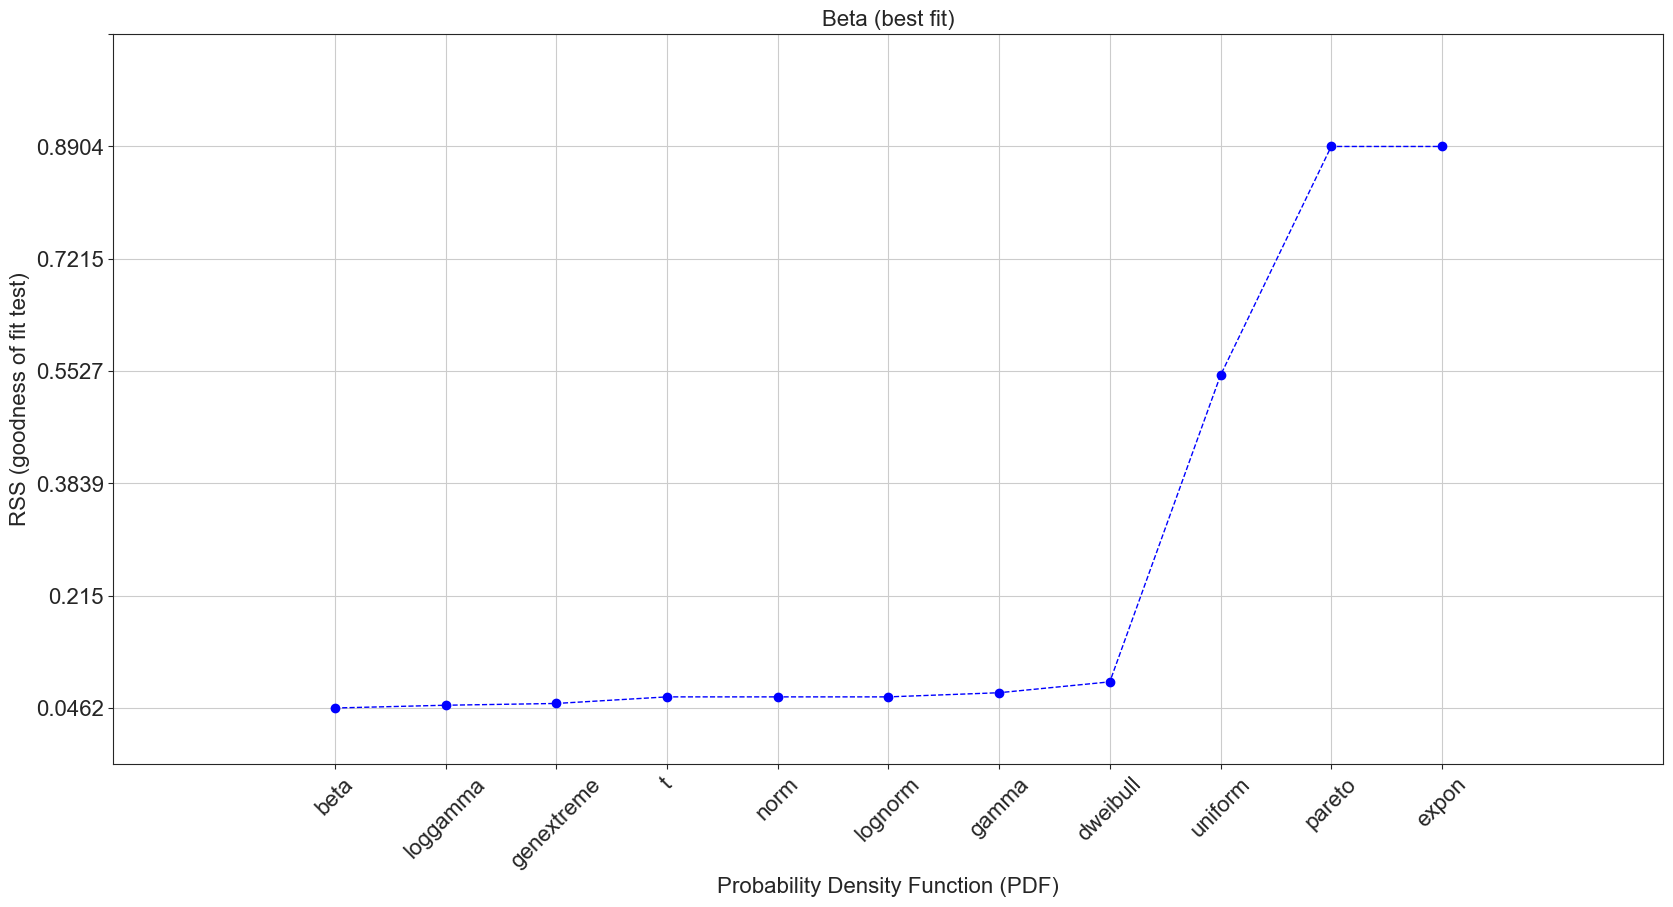

In [31]:
from distfit import distfit

dfit = distfit()
results = dfit.fit_transform(comedia_df['nota'])

# Plot summary
dfit.plot_summary()

Para asegurar que la variable tiene una distribución normal, hemos ejecutado un disfit para comprobarlo. A menor PDF, mayor es la distribución con ese valor menor. En este caso, podemos ver que la variable normal presenta un valor bajo

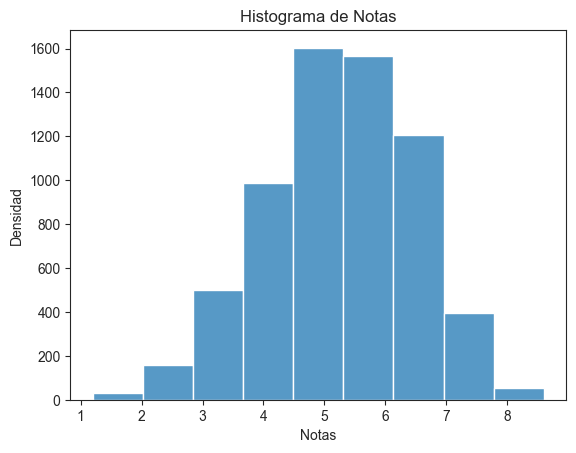

In [32]:
sns.histplot(data=comedia_df, x='nota', fill=True, bins=9)
plt.title('Histograma de Notas')
plt.xlabel('Notas')
plt.ylabel('Densidad')
plt.show()

Para continuar con el análisis descriptivo, hemos realizado un histograma de la variable de notas. Como vemos, es una variable continua que presenta mucho valores cercanos al 5 (media)

In [33]:
media = statistics.mean(comedia_df['nota'])

median = statistics.median(comedia_df['nota'])

moda = statistics.mode(comedia_df['nota'])

desviacion_estandar = statistics.stdev(comedia_df['nota'])

print(f'la media es {media}, la mediana es {median} y la moda es {moda}, la stdev es {desviacion_estandar}')

la media es 5.2506533435818605, la mediana es 5.3 y la moda es 6.2, la stdev es 1.2042041286806977


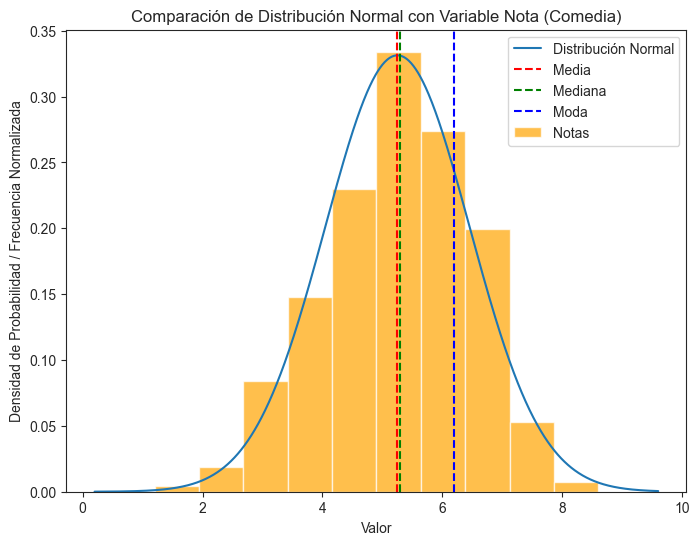

In [34]:
x = np.linspace(min(comedia_df['nota']) - 1, max(comedia_df['nota']) + 1, 1000)

pdf = norm.pdf(x, loc=media, scale=desviacion_estandar)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Distribución Normal')

plt.axvline(media, color='r', linestyle='--', label='Media')
plt.axvline(median, color='g', linestyle='--', label='Mediana')
plt.axvline(moda, color='b', linestyle='--', label='Moda')

plt.hist(comedia_df['nota'], bins=10, density=True, alpha=0.7, color='orange', label='Notas')

plt.title('Comparación de Distribución Normal con Variable Nota (Comedia)')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad / Frecuencia Normalizada')
plt.legend()

plt.show()

Ahora, hemos realizado un histograma con una comparación de la distribución normal con nuestra variable nota. Para ello, se muestra la media, mediana y moda están marcadas, indicando una distribución simétrica centrada alrededor del valor 5. Las notas siguen de cerca la curva de la distribución normal.

In [35]:
variable_normal_comedia = norm(loc=media, scale=desviacion_estandar)

valor = 6.2
probabilidad = norm.cdf(valor, loc=media, scale=desviacion_estandar)

print(f"La probabilidad de que la variable sea menor o igual a {valor} es: {probabilidad}")

La probabilidad de que la variable sea menor o igual a 6.2 es: 0.7847569897948241


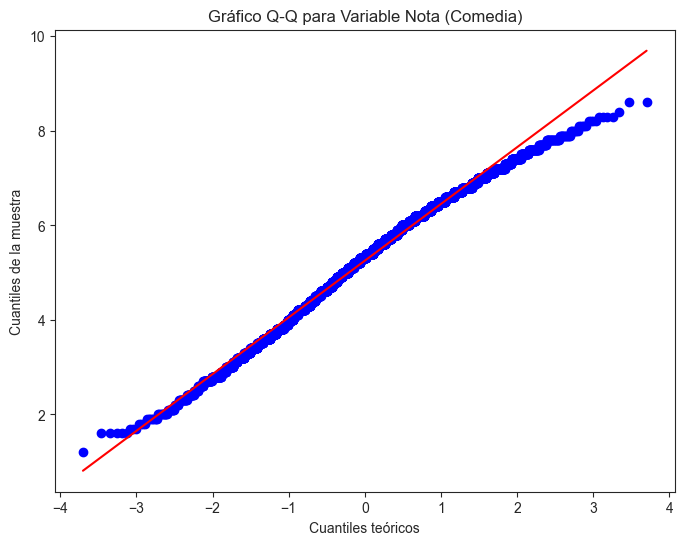

In [36]:
from scipy.stats import probplot

# Crear el gráfico Q-Q
plt.figure(figsize=(8, 6))
probplot(comedia_df['nota'], dist='norm', plot=plt)

plt.title('Gráfico Q-Q para Variable Nota (Comedia)')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de la muestra')

plt.show()

Hemos realizado un Q-Q plot, para observar si la variable nota efectivamente sigue ua distribución normal. Como vemos, la linea no es perfecta, pero si que se asemeja bastante a una recta, por ello podemos asumir que sigue una distribución normal.

##### NOTAS DRAMA

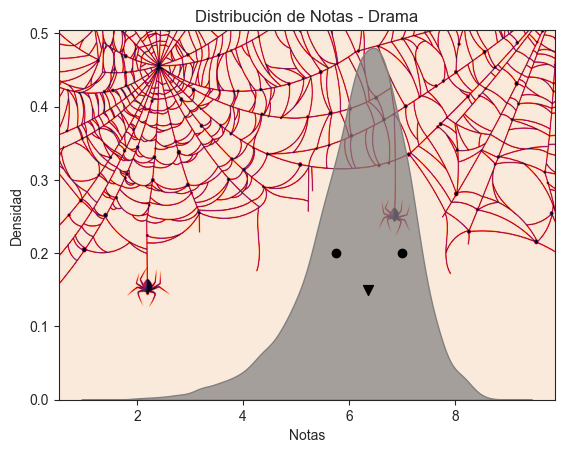

In [37]:
drama_df = df[df['genero'] == 'Drama']

sns.kdeplot(data=drama_df, x='nota', fill=True, color='grey', alpha=0.7)
plt.title('Distribución de Notas - Drama')
plt.xlabel('Notas')
plt.ylabel('Densidad')

plt.imshow(background_image, aspect='auto', extent=plt.gca().get_xlim() + plt.gca().get_ylim(), zorder=-1)

plt.scatter([5.75, 7], [0.20, 0.20], color='black', marker='o')
plt.scatter([6.35], [0.15], color='black', marker='v', s=50)

plt.show()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.128859] [loc=6.190 scale=0.943]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 2.64738] [loc=1.400 scale=4.790]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 2.64738] [loc=-1073741822.600 scale=1073741824.000]
[distfit] >INFO> [dweibull  ] [0.10 sec] [RSS: 0.100442] [loc=6.253 scale=0.765]
[distfit] >INFO> [t         ] [0.61 sec] [RSS: 0.0891971] [loc=6.254 scale=0.797]
[distfit] >INFO> [genextreme] [0.13 sec] [RSS: 0.163496] [loc=5.864 scale=1.010]
[distfit] >INFO> [gamma     ] [0.29 sec] [RSS: 0.178018] [loc=-9.603 scale=0.061]
[distfit] >INFO> [lognorm   ] [0.01 sec] [RSS: 0.128859] [loc=-2097150.600 scale=2097156.790]
[distfit] >INFO> [beta      ] [0.08 sec] [RSS: 3.20319] [loc=0.863 scale=0.000]
[distfit] >INFO> [uniform   ] [0.0 sec] [RSS: 1.92203] [loc=1.400 scale=7.600]
[distfit] >INFO> [loggamma  ] [0.03 sec] [RSS: 0.0607859] [loc=5.294 scale=1.323]
[distfit] >INFO> Compute confid

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Loggamma (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

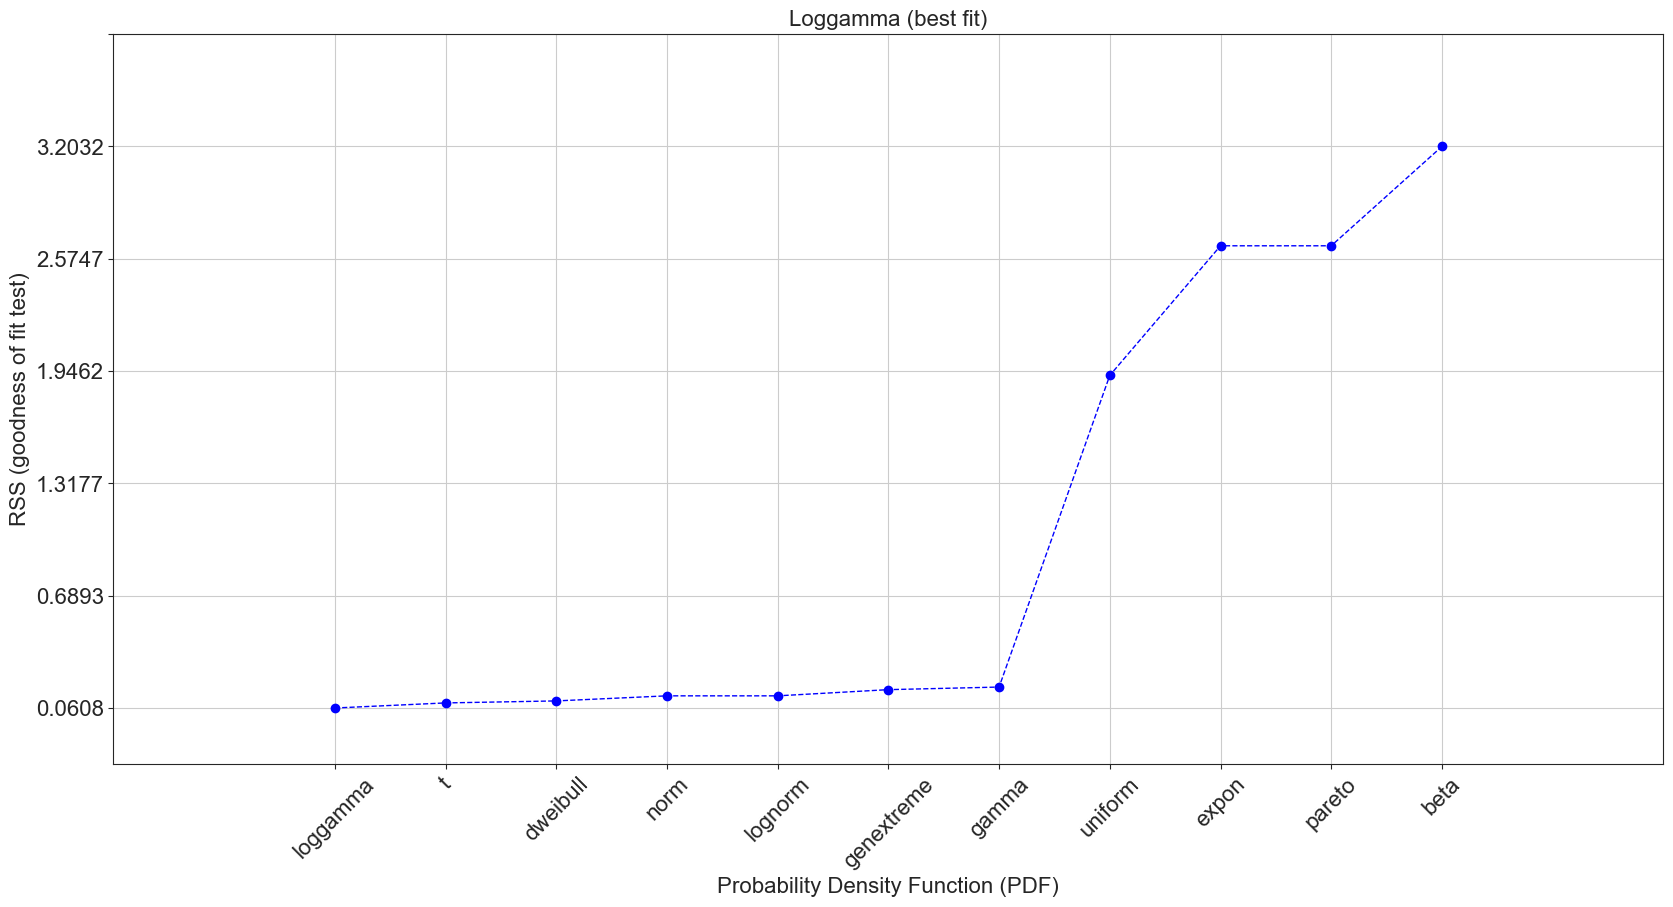

In [38]:
from distfit import distfit

dfit = distfit()
results = dfit.fit_transform(drama_df['nota'])

# Plot summary
dfit.plot_summary()

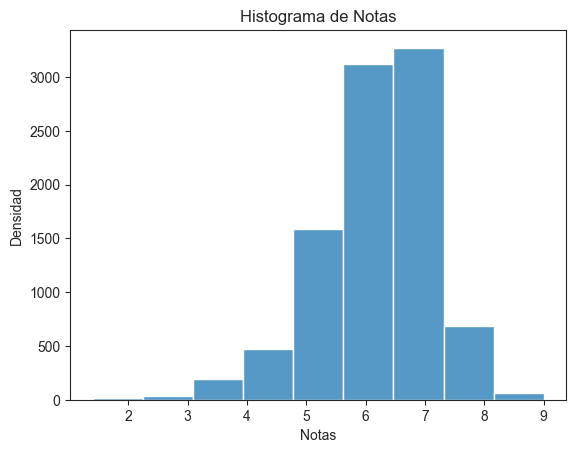

In [39]:
sns.histplot(data=drama_df, x='nota', fill=True, bins=9)
plt.title('Histograma de Notas')
plt.xlabel('Notas')
plt.ylabel('Densidad')
plt.show()

In [40]:
mediad = statistics.mean(drama_df['nota'])

mediand = statistics.median(drama_df['nota'])

modad = statistics.mode(drama_df['nota'])

desviacion_estandard = statistics.stdev(drama_df['nota'])

print(f'la media es {mediad}, la mediana es {mediand} y la moda es {modad}, la stdev es {desviacion_estandard}')

la media es 6.189630335769516, la mediana es 6.3 y la moda es 6.6, la stdev es 0.9434011904436473


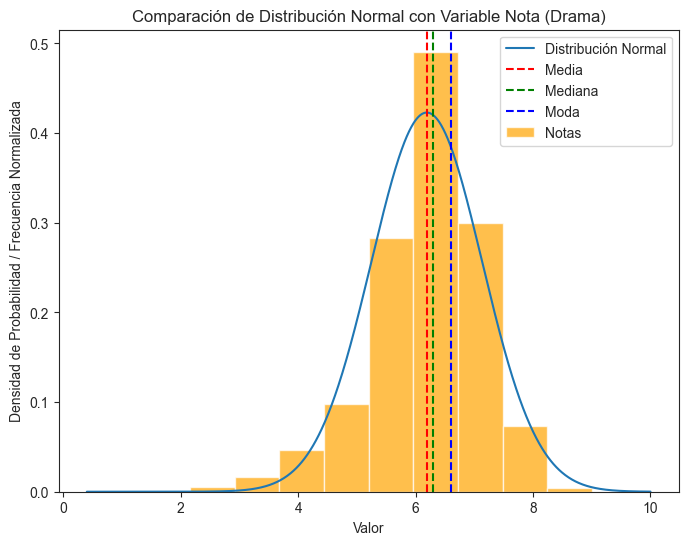

In [41]:
x = np.linspace(min(drama_df['nota']) - 1, max(drama_df['nota']) + 1, 1000)

pdf = norm.pdf(x, loc=mediad, scale=desviacion_estandard)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Distribución Normal')

plt.axvline(mediad, color='r', linestyle='--', label='Media')
plt.axvline(mediand, color='g', linestyle='--', label='Mediana')
plt.axvline(modad, color='b', linestyle='--', label='Moda')

plt.hist(drama_df['nota'], bins=10, density=True, alpha=0.7, color='orange', label='Notas')

plt.title('Comparación de Distribución Normal con Variable Nota (Drama)')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad / Frecuencia Normalizada')
plt.legend()

plt.show()

In [42]:
variable_normal_drama = norm(loc=mediad, scale=desviacion_estandard)

valor = 6.6
probabilidad = norm.cdf(valor, loc=mediad, scale=desviacion_estandard)

print(f"La probabilidad de que la variable sea menor o igual a {valor} es: {probabilidad}")

La probabilidad de que la variable sea menor o igual a 6.6 es: 0.6682149955721648


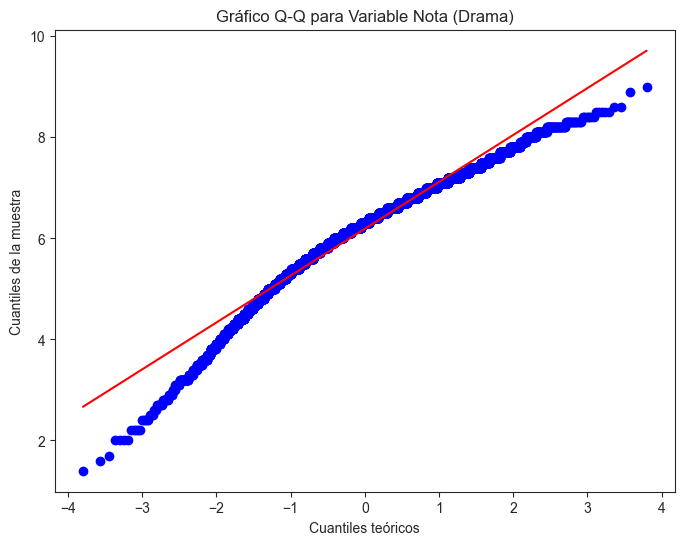

In [43]:
from scipy.stats import probplot

# Crear el gráfico Q-Q
plt.figure(figsize=(8, 6))
probplot(drama_df['nota'], dist='norm', plot=plt)

plt.title('Gráfico Q-Q para Variable Nota (Drama)')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de la muestra')

plt.show()

##### NOTAS ROMANCE

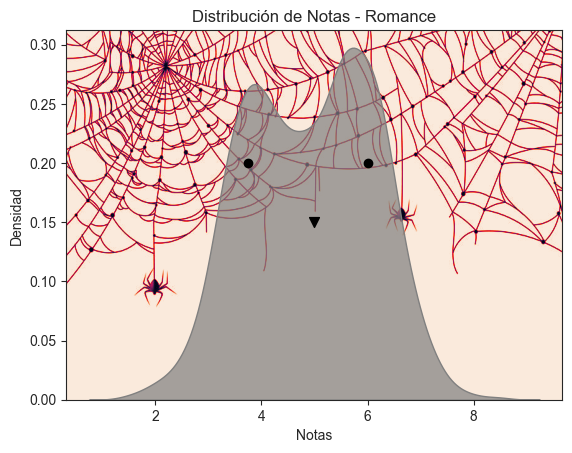

In [44]:
romance_df = df[df['genero'] == 'Romance']

sns.kdeplot(data=romance_df, x='nota', fill=True, color='grey', alpha=0.7)
plt.title('Distribución de Notas - Romance')
plt.xlabel('Notas')
plt.ylabel('Densidad')

plt.imshow(background_image, aspect='auto', extent=plt.gca().get_xlim() + plt.gca().get_ylim(), zorder=-1)

plt.scatter([3.75, 6], [0.20, 0.20], color='black', marker='o')
plt.scatter([5.00], [0.15], color='black', marker='v', s=50)

plt.show()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0941111] [loc=4.914 scale=1.200]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.553007] [loc=1.500 scale=3.414]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.553007] [loc=-268435454.500 scale=268435456.000]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 0.0724734] [loc=4.847 scale=1.137]
[distfit] >INFO> [t         ] [0.43 sec] [RSS: 0.0941112] [loc=4.914 scale=1.200]
[distfit] >INFO> [genextreme] [0.07 sec] [RSS: 0.0828227] [loc=4.490 scale=1.202]
[distfit] >INFO> [gamma     ] [0.11 sec] [RSS: 0.0947767] [loc=-32.504 scale=0.039]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.0941119] [loc=-65529.208 scale=65534.123]
[distfit] >INFO> [beta      ] [0.26 sec] [RSS: 0.0725206] [loc=0.864 scale=7.897]
[distfit] >INFO> [uniform   ] [0.0 sec] [RSS: 0.347665] [loc=1.500 scale=7.000]
[distfit] >INFO> [loggamma  ] [0.04 sec] [RSS: 0.0923984] [loc=-32.320 scale=9.162]
[distfit] >INFO> Compute

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Dweibull (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

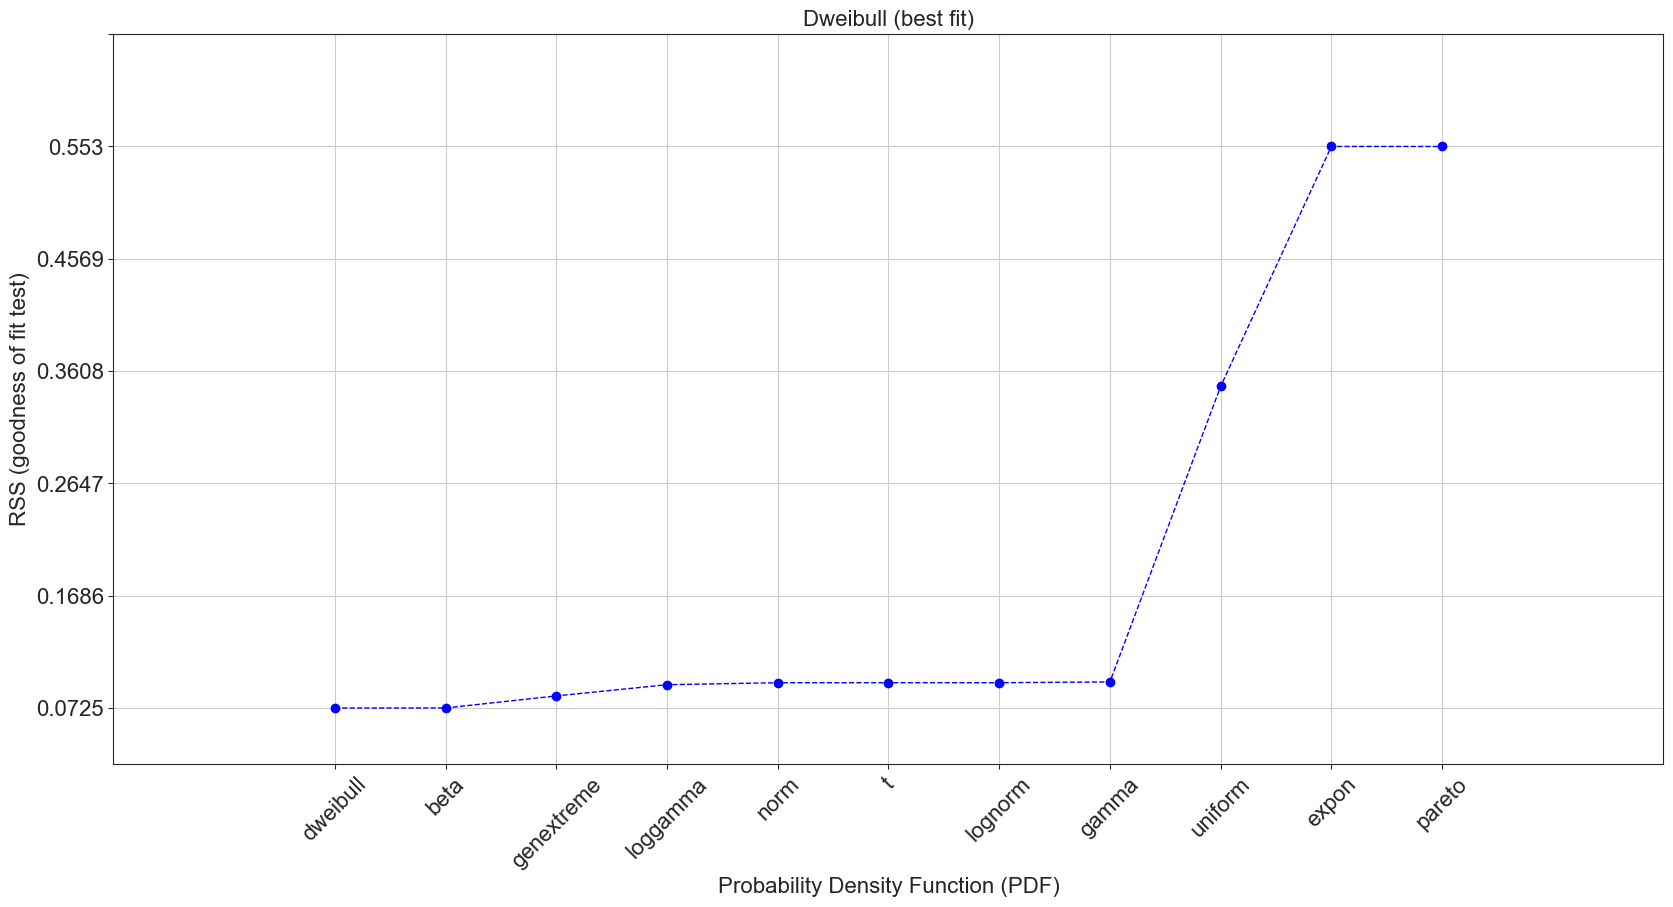

In [45]:
from distfit import distfit

dfit = distfit()
results = dfit.fit_transform(romance_df['nota'])

# Plot summary
dfit.plot_summary()

In [46]:
mediar = statistics.mean(romance_df['nota'])

medianr = statistics.median(romance_df['nota'])

modar = statistics.mode(romance_df['nota'])

desviacion_estandarr = statistics.stdev(romance_df['nota'])

print(f'la media es {mediar}, la mediana es {medianr} y la moda es {modar}, la stdev es {desviacion_estandarr}')

la media es 4.914415094339622, la mediana es 5.0 y la moda es 5.6, la stdev es 1.2002845616101407


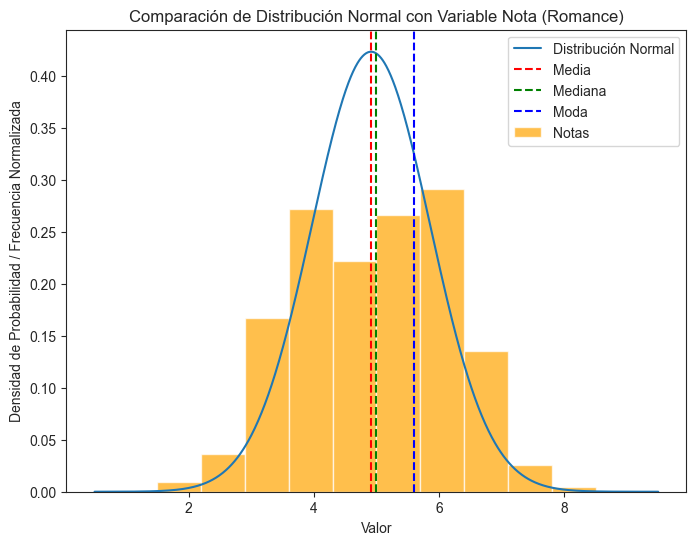

In [47]:
x = np.linspace(min(romance_df['nota']) - 1, max(romance_df['nota']) + 1, 1000)

pdf = norm.pdf(x, loc=mediar, scale=desviacion_estandard)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label='Distribución Normal')

plt.axvline(mediar, color='r', linestyle='--', label='Media')
plt.axvline(medianr, color='g', linestyle='--', label='Mediana')
plt.axvline(modar, color='b', linestyle='--', label='Moda')

plt.hist(romance_df['nota'], bins=10, density=True, alpha=0.7, color='orange', label='Notas')

plt.title('Comparación de Distribución Normal con Variable Nota (Romance)')
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad / Frecuencia Normalizada')
plt.legend()

plt.show()

In [48]:
variable_normal_romance = norm(loc=mediar, scale=desviacion_estandarr)

valor = 5.6
probabilidad = norm.cdf(valor, loc=mediar, scale=desviacion_estandarr)

print(f"La probabilidad de que la variable sea menor o igual a {valor} es: {probabilidad}")

La probabilidad de que la variable sea menor o igual a 5.6 es: 0.716062981480778


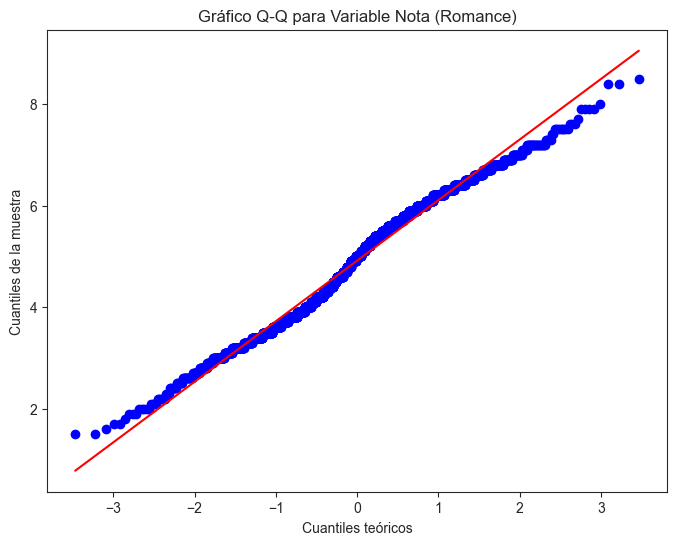

In [49]:
# Crear el gráfico Q-Q
plt.figure(figsize=(8, 6))
probplot(romance_df['nota'], dist='norm', plot=plt)

plt.title('Gráfico Q-Q para Variable Nota (Romance)')
plt.xlabel('Cuantiles teóricos')
plt.ylabel('Cuantiles de la muestra')

plt.show()

### ESTADISTICA

#### GRÁFICO DE TARTA

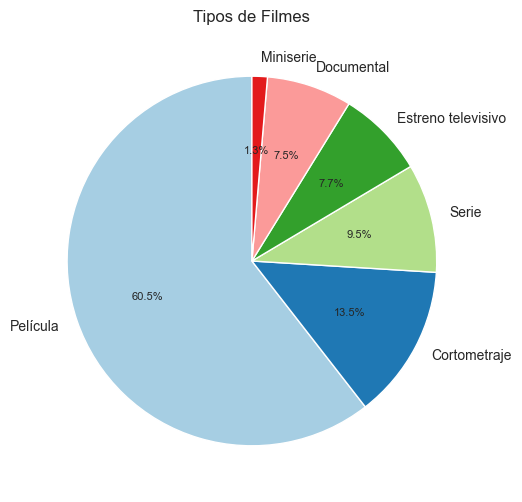

In [50]:
conteo_tipo_filme = df['tipo_filme'].value_counts().head(50)

plt.figure(figsize=(10, 6))
sns.set(style="ticks")
sns.color_palette("Paired")
sns.set_palette("Paired")

patches, texts, autotexts = plt.pie(conteo_tipo_filme, labels=conteo_tipo_filme.index, autopct='%1.1f%%', startangle=90)

for text, autotext in zip(texts, autotexts):
    text.set_fontsize(10)
    autotext.set_fontsize(8)

plt.title('Tipos de Filmes')
plt.show()

Continuando con el análisis hemos realizado un gráfico de tarta que esta buenisima [MRDB]: xd . En él, observamos como se distribuye la tipología de las películas, y como la categoría que predomina es la de películas al uso (60,5%), seguida de cortometrajes (13,5%). Destaca las miniseries con un pequeño porcentaje (1,3%)

#### BOXPLOTS

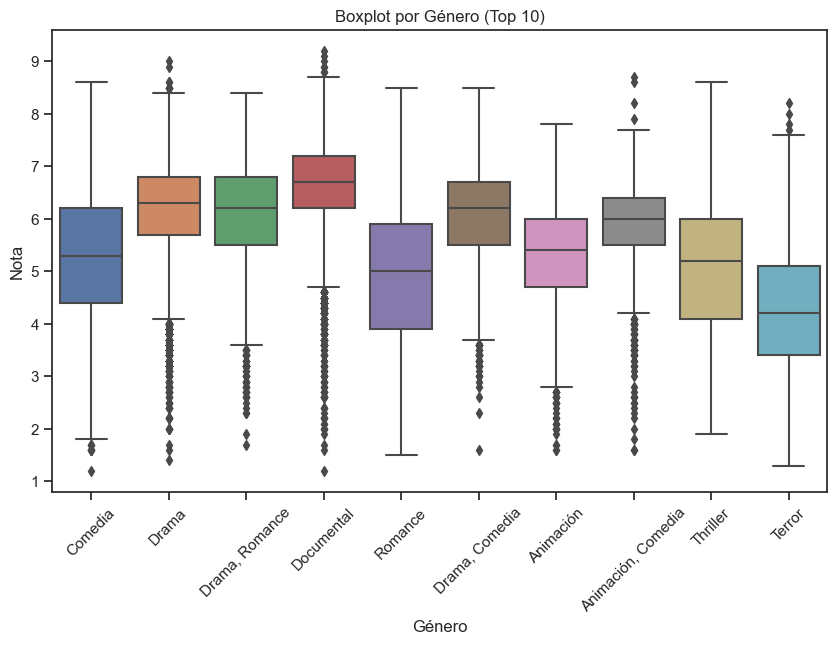

In [51]:
top_10_generos = df['genero'].value_counts().head(10).index

df_top_10 = df[df['genero'].isin(top_10_generos)]

plt.figure(figsize=(10, 6))
sns.set(style="ticks")

sns.boxplot(x='genero', y='nota', data=df_top_10)

plt.title('Boxplot por Género (Top 10)')
plt.xlabel('Género')
plt.xticks(rotation=45)
plt.ylabel('Nota')
plt.show()

- Comedia: Mediana alrededor de 6, con amplia variabilidad en las notas.
- Drama: Mediana cerca de 7, algunos outliers indican notas más bajas.
- Romance: Similar al drama, menos variabilidad y outliers.
- Documental: Mediana alta (cerca de 8), pocos outliers, notas consistentemente altas.
- Intriga: Mediana cerca de 7, amplia variabilidad, varios outliers.
- Aventuras: Mediana similar a Intriga, menos outliers superiores.
- Animación: Mediana alrededor de 7, consistencia en las notas, pocos outliers.
- Thriller: Mediana cerca de 6.5, amplia variabilidad en las notas.
- Acción: Similar al thriller, menos outliers inferiores.
- Terror: Mediana por debajo de 7, algunos outliers superiores indican notas más altas.


1. Rango de notas: Los documentales exhiben el rango de notas más alto en comparación con otros géneros cinematográficos. Este indicador sugiere que las películas documentales tienden a recibir calificaciones más elevadas en general. Contrariamente, los géneros de Comedia y Thriller presentan rangos de notas más bajos, indicando que las películas pertenecientes a estos géneros tienden a obtener calificaciones más bajas en términos generales.
2. Mediana de notas: La mediana de notas para los documentales es la más alta, indicando que la calificación típica para estas películas es superior. En contraste, los géneros de Terror y Comedia exhiben las medianas de notas más bajas, sugiriendo que la calificación típica para películas de estos géneros es inferior en comparación con otros.
4. Variabilidad de notas: Géneros como Comedia, Intriga, Thriller y Acción presentan una variabilidad destacada en sus calificaciones, evidenciada por la longitud de las cajas en sus respectivos boxplots. Esto implica que las calificaciones para las películas de estos géneros pueden variar considerablemente. Por otro lado, los géneros de Documental y Animación exhiben una menor variabilidad en las calificaciones, indicando que estas son más consistentes para las películas de estos géneros.
4. Outliers: Los géneros de Drama e Intriga muestran un número significativo de outliers, tanto en el extremo superior como en el inferior. Esta observación sugiere que, aunque la mayoría de las películas de estos géneros obtienen calificaciones alrededor de la mediana, existen algunas películas que reciben calificaciones significativamente más altas o más bajas, indicando una mayor dispersión en la calidad percibida de estas películas.

[MRDB]: Buena descripción

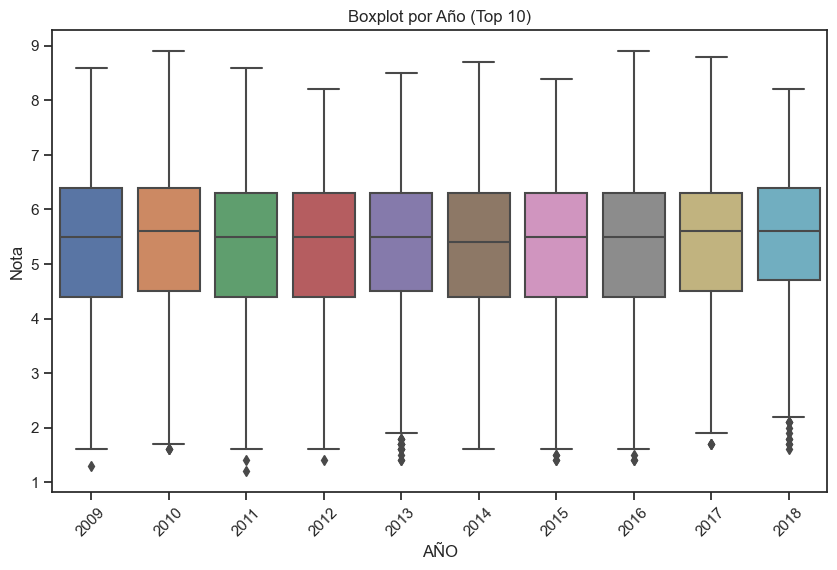

In [52]:
top_10_generos = df['anyo'].value_counts().head(10).index

df_top_10 = df[df['anyo'].isin(top_10_generos)]

plt.figure(figsize=(10, 6))
sns.set(style="ticks")

sns.boxplot(x='anyo', y='nota', data=df_top_10)

plt.title('Boxplot por Año (Top 10)')
plt.xlabel('AÑO')
plt.xticks(rotation=45)
plt.ylabel('Nota')
plt.show()

El gráfico boxplot muestra la distribución de las notas desde 2009 hasta 2018. Se observa una tendencia general al aumento en la mediana de las notas. Los años 2011 y 2018 muestran una mayor dispersión en las notas, indicando una variabilidad más amplia. En contraste, los años como 2010 y 2017 presentan una menor dispersión, señalando consistencia en las calificaciones obtenidas. También se observan algunos valores atípicos en los años 2011 y de 2015 a 2018.

#### VIOLINES

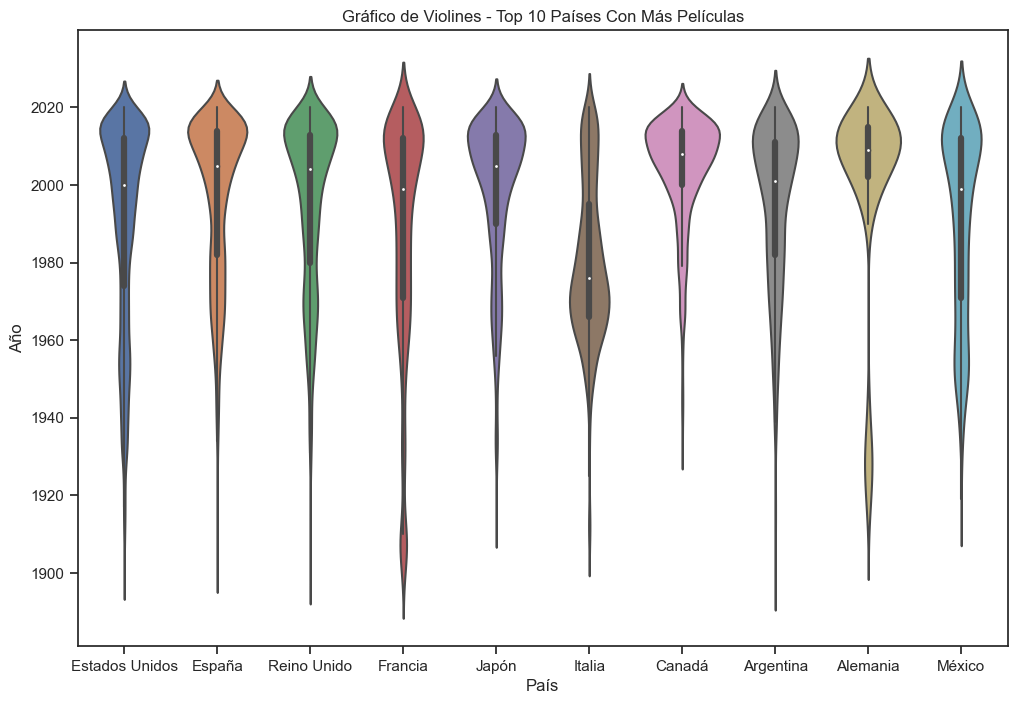

In [53]:
top_countries = df['pais'].value_counts().nlargest(10).index

df_top_countries = df[df['pais'].isin(top_countries)]

plt.figure(figsize=(12, 8))
sns.violinplot(x='pais', y='anyo', data=df_top_countries, order=top_countries)
plt.title('Gráfico de Violines - Top 10 Países Con Más Películas')
plt.xlabel('País')
plt.ylabel('Año')
plt.show()

El gráfico muestra los 10 países con más películas. El eje x muestra el país y el eje y muestra el año. Las líneas representan el rango de años en que cada país ha producido películas, con el año mediano representado por la línea gruesa en el centro. Los países están listados en orden descendente según el número de películas producidas, con Estados Unidos en la cima y México en la parte inferior.

Estados Unidos ha producido la mayor cantidad de películas, con un rango de más de 100 años. El año mediano para las películas producidas en Estados Unidos es 1990. España es el segundo productor más grande de películas, con un rango de más de 80 años. El año mediano para las películas producidas en España es 1975. El Reino Unido es el tercer productor más grande de películas, con un rango de más de 80 años. El año mediano para las películas producidas en el Reino Unido es 1970.

Francia es el cuarto productor más grande de películas, con un rango de más de 70 años. El año mediano para las películas producidas en Francia es 1960. Japón es el quinto productor más grande de películas, con un rango de más de 60 años. El año mediano para las películas producidas en Japón es 1955. Italia es el sexto productor más grande de películas, con un rango de más de 60 años. El año mediano para las películas producidas en Italia es 1950.

Canadá es el séptimo productor más grande de películas, con un rango de más de 50 años. El año mediano para las películas producidas en Canadá es 1980. Argentina es el octavo productor más grande de películas, con un rango de más de 40 años. El año mediano para las películas producidas en Argentina es 1965. Alemania es el noveno productor más grande de películas, con un rango de más de 40 años. El año mediano para las películas producidas en Alemania es 1960. México es el décimo productor más grande de películas, con un rango de más de 30 años. El año mediano para las películas producidas en México es 1975.

[MRDB]: ya veo que sí que había más detalle en la explicación. Buenos comentarios.

### TESTS

#### UNIVARIABLE

In [55]:
import math

np.random.seed(10)

sample_size = len(comedia_df)
sample = np.random.choice(a= comedia_df['nota'], size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)

pop_stdev = comedia_df['nota'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(5.217316169771077, 5.275842938607094)


Ahora realizamos un intervalo de confianza de la variable nota en el subdataset comedia_df. Para ello, con una confianza del 95% podemos asegurar que la media de la nota se encuentra entre 5.21 y 5.27 puntos. 

Por otro lado el valor del estadístico Z = 1.9599 quiere decir que el límite inferior del intervalo estará ubicado a 1.959963984540054 desviaciones típicas por debajo de la media, mientras que el límite superior estará ubicado a 1.959963984540054 desviaciones típicas por encima de la media.

In [56]:
import math

np.random.seed(10)

sample_size = len(drama_df)
sample = np.random.choice(a= drama_df['nota'], size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)

pop_stdev = drama_df['nota'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(6.165601008928993, 6.203660721819869)


In [57]:
import math

np.random.seed(10)

sample_size = len(romance_df)
sample = np.random.choice(a= romance_df['nota'], size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)

pop_stdev = romance_df['nota'].std()  # Get the population standard deviation

margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(4.850715812610573, 4.942114376068672)


#### BIVARIATE

In [58]:
stats.ttest_ind(a= comedia_df['nota'],
                b= drama_df['nota'],
                equal_var=False)

TtestResult(statistic=-52.722214362525456, pvalue=0.0, df=11723.526094220153)

Ahora, a través de un t-test, vamos a realizar una serie de análisis bivariantes. Para ello comparamos la variable nota de las películas del género comedia y de las del género drama. Para ello evaluamos el valor del estadístico t = -52.722, que quiere decir que, este es un valor numérico que cuantifica la diferencia entre las medias de los dos grupos en términos de desviaciones típicas. En este caso, el estadísticoi ndica que la diferencia entre las medias de los grupos de comedia y drama es -52.722 desviaciones típicas. Dado que este valor es negativo, sugiere que la media del grupo de comedia es significativamente menor que la del grupo de drama. 

Por otro lado, el valor p = 0.0, significa que la probabilidad de observar una diferencia tan extrema entre las medias de los grupos de comedia y drama, asumiendo que no hay diferencia real entre ellos, es prácticamente cero. En otras palabras, hay evidencia estadística significativa para rechazar la hipótesis nula de que las medias de los dos grupos son iguales.

Por ello, el resultado indica que hay una diferencia significativa entre las calificaciones promedio de las películas de comedia y drama, con un puntaje más bajo para las películas de comedia en comparación con las de drama.

In [59]:
stats.ttest_ind(a= comedia_df['nota'],
                b= romance_df['nota'],
                equal_var=False)

TtestResult(statistic=12.144216901505194, pvalue=1.8428611200895804e-33, df=4929.250998516425)

In [60]:
df1 = df[df['anyo'] == 2009]
df2 = df[df['anyo'] == 2010]

stats.ttest_ind(a= df1['nota'],
                b= df2['nota'],
                equal_var=False)

TtestResult(statistic=-1.3188513015725563, pvalue=0.18729965824753408, df=3736.2069587661263)

### ANOVA CON NOTAS

#### GENERO

In [61]:
df_anova = df[(df['genero'] == 'Comedia') | (df['genero'] == 'Drama') | (df['genero'] == 'Romance')
              | (df['genero'] == 'Animación')]

a_comedia = df_anova[df_anova['genero'] == 'Comedia']
a_drama = df_anova[df_anova['genero'] == 'Drama']
a_romance = df_anova[df['genero'] == 'Romance']
a_animacion = df_anova[df_anova['genero'] == 'Animación']


stats.f_oneway(a_comedia['nota'], a_drama['nota'], a_romance['nota'], a_animacion['nota'])

F_onewayResult(statistic=1574.5032972573806, pvalue=0.0)

Tras estudiar la homogeneidad entre las varianzas, llevamos a cabo un test de Anova entre la variable de género y nuestra variable continua, la nota. La realización de este test nos permite realizar comparaciones múltiples de medias de manera eficiente, proporcionando una visión más completa de las diferencias entre los grupos en lugar de realizar múltiples pruebas t independientes, lo que aumentaría la probabilidad de obtener resultados falsos positivos.

El resultado del test nos da que rechazamos la hipótesis nula, por lo que vemos que podemos decir que existe evidencia estadísticamente significativa para afirmar que al menos uno de los grupos tiene una media diferente de los demás en la variable que se está estudiando.

group1,group2,meandiff,p-adj,lower,upper,reject
Animación,Comedia,-0.0575,0.1643,-0.1289,0.014,False
Animación,Drama,0.8815,0.0,0.8126,0.9504,True
Animación,Romance,-0.3937,0.0,-0.4762,-0.3112,True
Comedia,Drama,0.939,0.0,0.8945,0.9834,True
Comedia,Romance,-0.3362,0.0,-0.3998,-0.2727,True
Drama,Romance,-1.2752,0.0,-1.3359,-1.2146,True


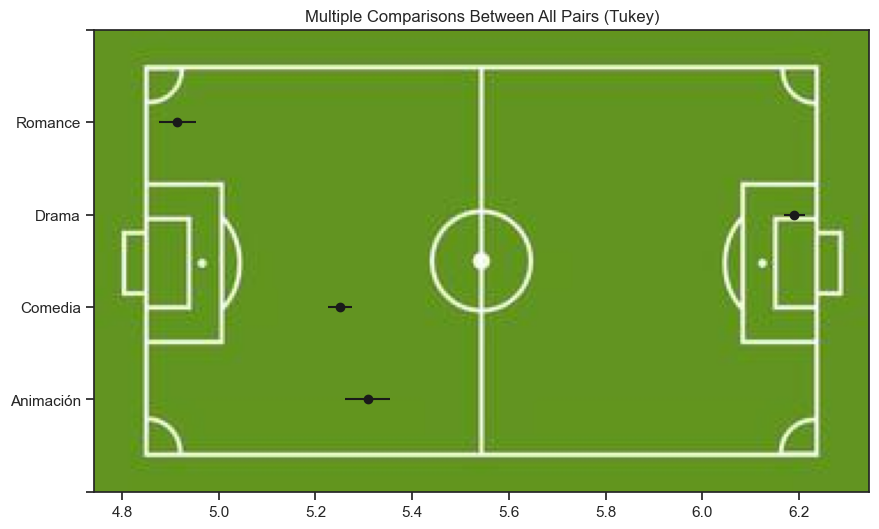

In [62]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
background_image = plt.imread('fot.jpg')


df_anova = pd.concat([a_comedia['nota'], a_drama['nota'], a_romance['nota'], a_animacion['nota'] ])
group_labels = ['Comedia'] * len(a_comedia) + ['Drama'] * len(a_drama) + ['Romance'] * len(a_romance) + ['Animación'] * len(a_animacion)

tukey_results = pairwise_tukeyhsd(df_anova, group_labels)
tukey_results.plot_simultaneous()
# plt.vlines(x=5.6,ymin=-0,ymax=3, color="red")
plt.imshow(background_image, aspect='auto', extent=plt.gca().get_xlim() + plt.gca().get_ylim(), zorder=-1)

tukey_results.summary()


La ANOVA no nos permite saber en qué medida un grupo es distinto del resto, o sea no sabemos si existe un grupo muy diferente al resto, o si todos los grupos son muy distintos entre sí. Para ver esto llevamos a cabo un una prueba ad-hoc mediante la función 'pairwise_tukeyhsd'.

Los resutados de este test nos da como resultado que existe una difeferencia significativa entre todos los grupos de género, menos entre los grupos de animación y comedia que sí que vemos que no existe evidencia significativa entre estos grupos.

#### AÑOS

In [63]:
df_filtered = df.dropna(subset=['nota', 'anyo'])
df_anova_a = df_filtered[df_filtered['anyo'].isin(top_10_generos)]

df_anova_a['nota_transformada'] = np.log(df_anova_a['nota'])

levene_result = stats.levene(df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2009],
                              df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2010],
                              df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2011],
                              df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2012],
                              df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2013],
                              df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2014],
                              df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2015],
                              df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2016],
                              df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2017],
                              df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2018]
                              )

print("Estadística de Levene (con transformación logarítmica):", levene_result.statistic)
print("Valor p:", levene_result.pvalue)

if levene_result.pvalue > 0.05:
    print("La homogeneidad de varianza no es significativa. Se puede proceder con el ANOVA.")
else:
    print("La homogeneidad de varianza es significativa. Considere utilizar métodos alternativos, como ANOVA con ajuste robusto o transformaciones adicionales.")

Estadística de Levene (con transformación logarítmica): 7.749773717342562
Valor p: 1.7832351697863588e-11
La homogeneidad de varianza es significativa. Considere utilizar métodos alternativos, como ANOVA con ajuste robusto o transformaciones adicionales.


Para llevar a cabo un test ANOVA de manera adecuada es preferible que las varianzas de entre los grupos sean aproximadamente iguales, a esto lo llamamos cumplir el principio de homogeneidad entre varianzas (homocedasticidad). 

Para estudiar esto llevamos a cabo el Test de Levene. El resultado que este test nos da es que la homogeneidad de varianza es significativa.

In [64]:
df_filtered = df.dropna(subset=['nota', 'anyo'])
df_anova_a = df_filtered[df_filtered['anyo'].isin(top_10_generos)]

df_anova_a['nota_transformada'] = np.log(df_anova_a['nota'])

bartlett_result = stats.bartlett(df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2009],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2010],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2011],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2012],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2013],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2014],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2015],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2016],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2017],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2018]
                                  )

print("Estadística de Bartlett (con transformación logarítmica):", bartlett_result.statistic)
print("Valor p:", bartlett_result.pvalue)

if bartlett_result.pvalue > 0.05:
    print("La homogeneidad de varianza no es significativa. Se puede proceder con el ANOVA.")
else:
    print("La homogeneidad de varianza es significativa. Considere utilizar métodos alternativos, como ANOVA con ajuste robusto o transformaciones adicionales.")

Estadística de Bartlett (con transformación logarítmica): 152.10383629658796
Valor p: 3.2321651597855617e-28
La homogeneidad de varianza es significativa. Considere utilizar métodos alternativos, como ANOVA con ajuste robusto o transformaciones adicionales.


Para estudiar esto llevamos a cabo el Test de Bartlett. El resultado que este test nos da es que la homogeneidad de varianza es significativa. Por ello rechazamos la hipótesis nula, es decir, existe heterocedasticidad o homogeneidad entre las varianzas

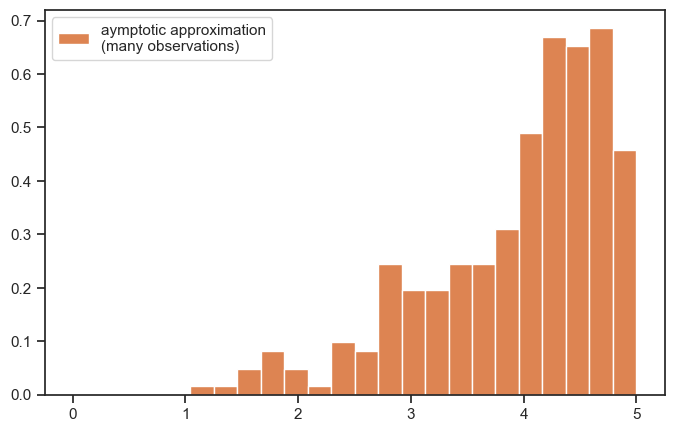

In [65]:
def statistic(*samples):
    return stats.bartlett(*samples).statistic
ref = stats.permutation_test(
    (df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2009],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2010],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2011],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2012],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2013],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2014],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2015],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2016],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2017],
                                  df_anova_a['nota_transformada'][df_anova_a['anyo'] == 2018]
                                  ), statistic,
    permutation_type='independent', alternative='greater'
)
fig, ax = plt.subplots(figsize=(8, 5))
bins = np.linspace(0, 5, 25)
ax.hist(
    ref.null_distribution, bins=bins, density=True, facecolor="C1"
)
ax.legend(['aymptotic approximation\n(many observations)',
           'randomized null distribution'])
plt.show()

Para trabajar con nuestra variable, hemos convertido a logarítmica la misma y hemos realizado un gráfico sobre la prueba de Barlett.

In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# df_anova_a = df[df['anyo'].isin(top_10_generos)]

# Alternate method
model = ols('nota ~ anyo',                 # Model formula
            data = df_anova_a).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print (anova_result)


               sum_sq       df         F    PR(>F)
anyo          9.53785      1.0  5.660969  0.017355
Residual  37595.61348  22314.0       NaN       NaN


Volvemos a hacer un test de ANOVA entre los grupos de géneros y nuestra variable continua, la nota. El resultado del test nos da que rechazamos la hipótesis nula, por lo que vemos que podemos decir que existe evidencia estadísticamente significativa para afirmar que al menos uno de los grupos tiene una media diferente de los demás en la variable que se está estudiando.

group1,group2,meandiff,p-adj,lower,upper,reject
2009,2010,0.0594,0.9272,-0.0747,0.1936,False
2009,2011,0.0125,1.0,-0.1202,0.1452,False
2009,2012,-0.0182,1.0,-0.1504,0.1139,False
2009,2013,0.0183,1.0,-0.1133,0.1499,False
2009,2014,-0.0198,1.0,-0.1512,0.1116,False
2009,2015,0.0094,1.0,-0.105,0.1239,False
2009,2016,0.0228,0.9999,-0.1082,0.1537,False
2009,2017,0.0714,0.7821,-0.0597,0.2025,False
2009,2018,0.1268,0.0771,-0.0063,0.2598,False
2010,2011,-0.0469,0.9819,-0.1786,0.0847,False


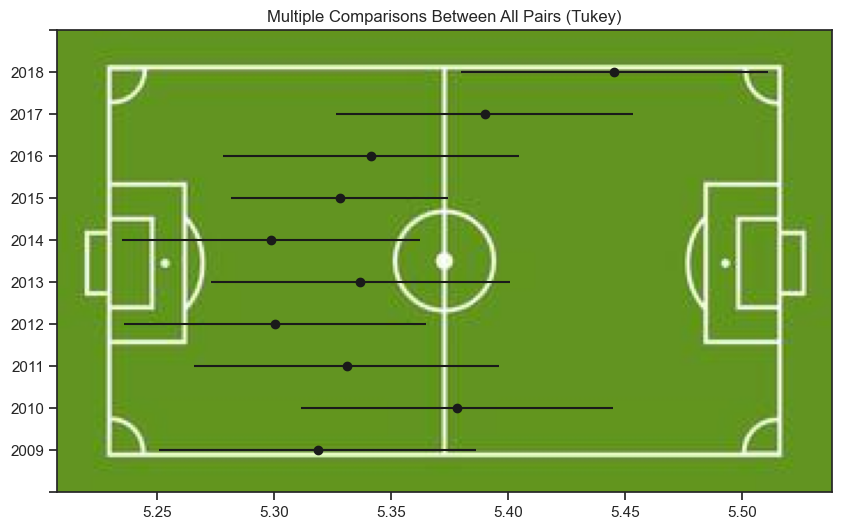

In [82]:
tukey_results = pairwise_tukeyhsd(df_anova_a['nota'], df_anova_a['anyo'])
tukey_results.plot_simultaneous()
# plt.vlines(x=5.37,ymin=-0,ymax=13, color="red")
plt.imshow(background_image, aspect='auto', extent=plt.gca().get_xlim() + plt.gca().get_ylim(), zorder=-1)

tukey_results.summary()


Llevamos a cabo una prueba ad-hoc para la variable de los años. Los resutados de este test nos da como resultado que no existe una difeferencia significativa entre la mayoría de los grupos, aunque sí que hay varios grupos en los que sí existe una diferencia significativa. Lo que tienen en común todas estas comparaciones es que está prensente el año 2018 en todas ellas, lo que nos hace ver que es un año especial para ser estudiado para intentar descubrir por qué se producen estas diferencias.

### ESTUDIO SOBRE LOS VALORES ATÍPICOS DEL AÑO 2018

In [68]:
df_2018 = df[(df['anyo'] >= 2009) & (df['anyo'] < 2019)]
df_2018 = df_2018.sort_values(by = ['nota'], ascending = False)

In [69]:
notas_por_anio = df_2018.groupby('anyo')['nota']
notas_por_anio.describe()

,count,mean,std,min,25%,50%,75%,max
anyo,,,,,,,,
2009,1846.0,5.318527,1.392038,1.3,4.4,5.5,6.4,8.6
2010,1901.0,5.377959,1.365628,1.6,4.5,5.6,6.4,8.9
2011,1992.0,5.331024,1.365828,1.2,4.4,5.5,6.3,8.6
2012,2024.0,5.300296,1.329326,1.4,4.4,5.5,6.3,8.2
2013,2062.0,5.336809,1.307018,1.4,4.5,5.5,6.3,8.5
2014,2072.0,5.298697,1.294360,1.6,4.4,5.4,6.3,8.7
2015,4250.0,5.327953,1.269624,1.4,4.4,5.5,6.3,8.4
2016,2104.0,5.341302,1.251058,1.4,4.4,5.5,6.3,8.9
2017,2096.0,5.389933,1.229175,1.7,4.5,5.6,6.3,8.8


In [70]:
promedio_por_tipo = df_2018.groupby(['anyo', 'tipo_filme'])['nota'].mean().unstack()
promedio_por_tipo.head(10)

tipo_filme,Cortometraje,Documental,Estreno televisivo,Miniserie,Película,Serie
anyo,,,,,,
2009,5.091593,6.683486,4.666477,5.261765,5.129713,5.571759
2010,5.166346,6.765581,4.663784,5.400000,5.204211,5.690732
2011,5.118541,6.796903,4.506699,6.145946,5.145759,5.575424
2012,5.025191,6.642731,4.607186,5.974286,5.075971,5.813393
2013,5.241969,6.572609,4.630319,6.077778,5.101388,5.799550
2014,5.085714,6.559307,4.800532,6.159375,5.025451,5.927982
2015,5.165988,6.570902,4.602907,6.239474,5.051103,5.929289
2016,5.174183,6.561826,4.615029,6.116667,5.024052,6.080843
2017,5.189811,6.532780,4.880597,6.478571,5.073532,6.024088


In [71]:
from scipy.stats import ttest_ind

notas_2018 = df[df['anyo'] == 2018]['nota']
notas_anteriores = df[(df['anyo'] >= 2009) & (df['anyo'] <= 2017)]['nota']

t_statistic, p_value = ttest_ind(notas_2018, notas_anteriores, equal_var=False)

print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

if p_value < 0.05:
    print('La diferencia en las medias es estadísticamente significativa. Las notas de 2018 son diferentes a las de los años anteriores.')
else:
    print('No hay evidencia estadística suficiente para afirmar que las notas de 2018 son diferentes a las de los años anteriores.')

T-Statistic: 3.8452140511852617
P-Value: 0.0001235328080995918
La diferencia en las medias es estadísticamente significativa. Las notas de 2018 son diferentes a las de los años anteriores.


In [72]:
from scipy.stats import f_oneway
df_anteriores = df[(df['anyo'] >= 2009) & (df['anyo'] < 2018)]


tipos_filme_2018 = df_2018['genero'].unique()

for tipo in tipos_filme_2018:
    notas_por_tipo = df_2018[df_2018['genero'] == tipo]['nota']
    
    f_statistic, p_value = f_oneway(notas_por_tipo, df_anteriores[df_anteriores['genero'] == tipo]['nota'])

    print(f'ANOVA para {tipo} en 2018:')
    print(f'F-Statistic: {f_statistic}')
    print(f'P-Value: {p_value}')

    if p_value < 0.05:
        print(f'La diferencia en las medias es estadísticamente significativa para {tipo}.')
    else:
        print(f'No hay evidencia estadística suficiente para afirmar diferencias en las medias para {tipo}.')
    print('\n')


ANOVA para Documental en 2018:
F-Statistic: 0.10874818739009333
P-Value: 0.7415850925427889
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Documental.


ANOVA para Acción, Aventuras, Drama, Fantástico, Intriga en 2018:
F-Statistic: nan
P-Value: nan
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Acción, Aventuras, Drama, Fantástico, Intriga.


ANOVA para Drama, Intriga, Thriller en 2018:
F-Statistic: 0.05912390941165685
P-Value: 0.8083268769915625
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Drama, Intriga, Thriller.


ANOVA para Romance en 2018:
F-Statistic: 0.0009432223852338013
P-Value: 0.9755010881618091
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Romance.


ANOVA para Drama en 2018:
F-Statistic: 0.07060713732664574
P-Value: 0.7904760130104062
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Drama.

ANOVA para Animación, Intriga en 2018:
F-Statistic: 0.0021345746030854147
P-Value: 0.9632758401676559
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Animación, Intriga.


ANOVA para Thriller en 2018:
F-Statistic: 0.4739579767157533
P-Value: 0.4912481879882925
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Thriller.


ANOVA para Ciencia ficción en 2018:
F-Statistic: 4.1325619244769694e-05
P-Value: 0.9948721200169008
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Ciencia ficción.


ANOVA para Aventuras, Ciencia ficción en 2018:
F-Statistic: 0.04970762322426236
P-Value: 0.8239862955058445
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Aventuras, Ciencia ficción.


ANOVA para Animación, Aventuras, Drama, Fantástico en 2018:
F-Statistic: 0.26209330828982563
P-Value: 0.6166657362831955
No hay evidencia estadística suficiente para afirmar diferenc

In [73]:
from scipy.stats import f_oneway

tipos_filme_2018 = df_2018['tipo_filme'].unique()

for tipo in tipos_filme_2018:
    notas_por_tipo = df_2018[df_2018['tipo_filme'] == tipo]['nota']
    
    f_statistic, p_value = f_oneway(notas_por_tipo, df_anteriores[df_anteriores['tipo_filme'] == tipo]['nota'])

    print(f'ANOVA para {tipo} en 2018:')
    print(f'F-Statistic: {f_statistic}')
    print(f'P-Value: {p_value}')

    if p_value < 0.05:
        print(f'La diferencia en las medias es estadísticamente significativa para {tipo}.')
    else:
        print(f'No hay evidencia estadística suficiente para afirmar diferencias en las medias para {tipo}.')
    print('\n')

ANOVA para Documental en 2018:
F-Statistic: 0.14400813424015138
P-Value: 0.7043450190165652
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Documental.


ANOVA para Serie en 2018:
F-Statistic: 0.2679251761519108
P-Value: 0.6047501479954478
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Serie.


ANOVA para Miniserie en 2018:
F-Statistic: 0.09897873954292057
P-Value: 0.753143214261212
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Miniserie.


ANOVA para Cortometraje en 2018:
F-Statistic: 0.04253146031732915
P-Value: 0.8366162495664744
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Cortometraje.


ANOVA para Película en 2018:
F-Statistic: 0.03246684584839553
P-Value: 0.8570085684724428
No hay evidencia estadística suficiente para afirmar diferencias en las medias para Película.


ANOVA para Estreno televisivo en 2018:
F-Statistic: 0.1022847488

In [74]:
import statsmodels.api as sm

df_anteriores = df[(df['anyo'] >= 2009) & (df['anyo'] < 2018)]

cantidad_por_genero_2018 = df_2018['genero'].value_counts()
cantidad_por_genero_anteriores = df_anteriores['genero'].value_counts()

df_genero = pd.DataFrame({
    'cantidad_2018': cantidad_por_genero_2018,
    'cantidad_anteriores': cantidad_por_genero_anteriores,
    'nota_media_2018': df_2018.groupby('genero')['nota'].mean(),
    'nota_media_anteriores': df_anteriores.groupby('genero')['nota'].mean()
})

df_genero = df_genero.fillna(df_genero.mean())

df_genero = df_genero.replace([np.inf, -np.inf], np.nan).dropna()

X = sm.add_constant(df_genero[['cantidad_2018', 'cantidad_anteriores']])
y = df_genero['nota_media_2018']
model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        nota_media_2018   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9103
Date:                Tue, 05 Mar 2024   Prob (F-statistic):              0.403
Time:                        14:13:47   Log-Likelihood:                -686.52
No. Observations:                 480   AIC:                             1379.
Df Residuals:                     477   BIC:                             1392.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.4723    

El modelo de regresión lineal ordinaria (OLS) muestra que la variable dependiente "nota_media_2018" no está significativamente influenciada por las variables independientes "cantidad_2018" y "cantidad_anteriores". El bajo R cuadrado (0.004) sugiere una escasa capacidad predictiva del modelo. Ningún coeficiente de variable independiente es estadísticamente significativo (p>|t| > 0.05), indicando una falta de relevancia en la relación propuesta. En resumen, el modelo no parece ser eficaz para explicar o predecir las notas en función de las variables incluidas

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


df_2009_2017 = df[df['anyo'].between(2009, 2017)]
df_2018 = df[df['anyo'] == 2018]

X_2009_2017 = df_2009_2017[['pais', 'tipo_filme', 'genero']]
y_2009_2017 = df_2009_2017['nota']

X_2018 = df_2018[['pais', 'tipo_filme', 'genero']]
y_2018 = df_2018['nota']

categorical_cols = ['pais', 'tipo_filme', 'genero']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X_2009_2017_encoded = preprocessor.fit_transform(X_2009_2017)

X_2018_encoded = preprocessor.transform(X_2018)

model = LinearRegression()

model.fit(X_2009_2017_encoded, y_2009_2017)
coef_2009_2017 = model.coef_

model.fit(X_2018_encoded, y_2018)
coef_2018 = model.coef_

coef_diff = coef_2018 - coef_2009_2017

coef_diff_df = pd.DataFrame({'Variable': preprocessor.get_feature_names_out(input_features=categorical_cols), 'Coefficient_Difference': coef_diff})

top_10_variables = coef_diff_df.reindex(coef_diff_df['Coefficient_Difference'].abs().sort_values(ascending=False).index).head(10)

print("Top 10 variables que más influyen en 2018 respecto a 2009-2017:")
top_10_variables


Top 10 variables que más influyen en 2018 respecto a 2009-2017:


,Variable,Coefficient_Difference
364,"cat__genero_Animación, Fantástico, Terror, Rom...",3.761818
182,"cat__genero_Acción, Aventuras, Ciencia ficción...",3.314369
94,cat__pais_Sri Lanka,3.125109
428,"cat__genero_Aventuras, Terror",2.993532
190,"cat__genero_Acción, Aventuras, Drama, Fantásti...",-2.960478
223,"cat__genero_Acción, Ciencia ficción, Intriga, ...",-2.861447
227,"cat__genero_Acción, Ciencia ficción, Terror, T...",2.795122
196,"cat__genero_Acción, Aventuras, Fantástico, Thr...",2.768397
577,"cat__genero_Terror, Western, Thriller",2.673413
289,"cat__genero_Animación, Aventuras, Ciencia ficc...",2.298806


El código utiliza scikit-learn para realizar una regresión lineal y evaluar cómo ciertas variables categóricas influyen en las notas de películas entre 2009-2017 y 2018. Se divide el conjunto de datos en dos períodos, se aplica codificación one-hot a las variables categóricas y se entrena un modelo para cada periodo. Luego, se calculan las diferencias en los coeficientes de las variables categóricas entre 2018 y 2009-2017, identificando las 10 variables más influyentes en las notas de 2018 en comparación con el periodo anterior. Este análisis proporciona insights sobre posibles cambios en las preferencias de audiencia a lo largo del tiempo.

#### REGRESIÓN CON EL TITULO DE LAS PELICULAS

In [76]:
df_2009_2017 = df[df['anyo'].between(2009, 2017)]
df_2018 = df[df['anyo'] == 2018]

X_2009_2017 = df_2009_2017[['titulo']]
y_2009_2017 = df_2009_2017['nota']

X_2018 = df_2018[['titulo']]
y_2018 = df_2018['nota']

categorical_cols = ['titulo']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X_2009_2017_encoded = preprocessor.fit_transform(X_2009_2017)

X_2018_encoded = preprocessor.transform(X_2018)

model = LinearRegression()

model.fit(X_2009_2017_encoded, y_2009_2017)
coef_2009_2017 = model.coef_

model.fit(X_2018_encoded, y_2018)
coef_2018 = model.coef_

coef_diff = coef_2018 - coef_2009_2017

coef_diff_df = pd.DataFrame({'Variable': preprocessor.get_feature_names_out(input_features=categorical_cols), 'Coefficient_Difference': coef_diff})

top_10_variables = coef_diff_df.reindex(coef_diff_df['Coefficient_Difference'].abs().sort_values(ascending=False).index).head(10)

print("Top 10 variables que más influyen en 2018 respecto a 2009-2017:")
top_10_variables


Top 10 variables que más influyen en 2018 respecto a 2009-2017:


,Variable,Coefficient_Difference
7993,cat__titulo_Justin Bieber: Bieber Mania (TV),4.134219
17000,cat__titulo_Unrated,4.034219
13819,cat__titulo_Shark Exorcist,3.934219
6921,cat__titulo_Hasta que callen las muñecas (C),3.934219
2123,cat__titulo_Blubberella,3.934219
7889,cat__titulo_Joker's Poltergeist,3.934219
1891,cat__titulo_Beyond the Call to Duty,3.934219
6213,cat__titulo_Foodfight!,3.934219
7975,cat__titulo_Jurassic Attack,3.934219
10267,cat__titulo_Macho peruano que se respeta,3.834219


In [77]:
df_2018['anyo'].value_counts()

2018    1969
Name: anyo, dtype: int64

Este es el número de películas que salieron el año 2018

In [80]:
sri18 = df_2009_2017[df_2009_2017['pais'] == 'Sri Lanka']
sri18

,titulo,anyo,pais,reparto,nota,tipo_filme,genero,direccion,decada,lustro,numero_reparto
45965,Valentine Crush(ed)! (C),2009,Sri Lanka,"Surenie De Silva, Eranga Hemajith, Danushka Ka...",1.9,Cortometraje,Romance,Anjula Rasanga Weerasinghe,2000,2005,4


[MRDB]: Muy buen trabajo de investigación

Vemos como Sri Lanka tira la media para muy abajo, con una nota de 1.9 puntos, es decir, se debería considerar como un valor atípico

## CONCLUSION

Como podemos ver, obtenemos diferencias en las notas sobre todo al compararlas por género. Esto se ha podido ver en nuestros análisis estadísticos previos. Esto gracias a la distribución normal.

También obtenemos que 2018 es un año especial al diferenciarse de las notas.

A su vez, hemos sido capaces de calcular probabilidades de las notas por género gracias a la distribución normal.

Más adelante, para profundizar en el dataset, habría que crear modelos de machine learning con el fin de obtener más insights sobre el dataset, y ser capaces de realizar predicciones.

[MRDB]: Muy buen trabajo. Muy completo, buenas explicaciones y bien justificadas. Los gráficos bastante elaborados y algunos con muy buenos comentarios. Un índice y unas secciones con nombres más correctos hubieran ayudado a la estructura y presentación del informe. Aunque lo dicho, muy buen trabajo en general y que sigáis pasándooslo tan bien haciendo trabajos.


También habéis elegido el mejor meme, algo os debería sumar... Nota: 9,5